# GRU

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
# data = pd.read_csv('c:/Users/USER/OneDrive - TNDigi Digital Marketing/Attachments/Uyen/Project/Ellie/PROJECT/5. New Project/data/Xinwu_data/Related/fortraining.csv')
# Đọc và chuẩn bị dữ liệu
data = pd.read_csv('/Users/nguyendinhhuy/Documents/NCKU/Code 2109 - 2024/testthudataa(1).csv')
data = data.sort_values(by='Time')


# # Select features for training
# features_to_keep = ['PM','PM_lw1', 'PM_lw2', 'PM_lw3', 'PM_lw4', 'PM_lw5', 'PM_lw6', 
#                'PM_lw7', 'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f',
#                'day', 'month', 'hour', 'minute','PM_s1','morning_peak_PM_lw1',
#                'evening_peak_PM_lw1','mean_PM']
features_to_keep = ['PM_steam','PM_s1', 'PM_s2', 'PM_s3', 'PM_s4', 'PM_s5', 'PM_s6', 'PM_s7',
                     'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f',
                     'day', 'month', 'hour', 'minute','PM_lw1','morning_peak_PM_s1',
                     'evening_peak_PM_s1','mean_PM_steam']

data = data[features_to_keep]

# Define features and target variable
X = data.drop('PM_steam', axis=1)
y = data['PM_steam']

# Calculate the total samples, ensuring divisibility by 288
total_samples = len(X)
train_size = int(total_samples * 0.8)
valid_size = int(total_samples * 0.1)
test_size = total_samples - train_size - valid_size

# Adjust sizes to be divisible by 288
train_size = train_size - (train_size % 288)
valid_size = valid_size - (valid_size % 288)
test_size = total_samples - train_size - valid_size

# Split the dataset by keeping time order
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_valid = X.iloc[train_size:train_size + valid_size]
y_valid = y.iloc[train_size:train_size + valid_size]

X_test = X.iloc[train_size + valid_size:]
y_test = y.iloc[train_size + valid_size:]

# Scale the features and target variables
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_valid_scaled = scaler_y.transform(y_valid.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape the data to 3D for GRU input (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_valid_reshaped = np.reshape(X_valid_scaled, (X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the GRU model
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))  # Adding dropout
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))  # Adding dropout
    model.add(Dense(1))  # Output layer for regression task
    optimizer = Adam(learning_rate=0.001)  # Reduce learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create the GRU model
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
gru_model = create_gru_model(input_shape)

# Train the model with validation data
history = gru_model.fit(
    X_train_reshaped, 
    y_train_scaled, 
    epochs=100, 
    batch_size=64, 
    verbose=2, 
    validation_data=(X_valid_reshaped, y_valid_scaled)
)


Epoch 1/100
792/792 - 2s - loss: 0.0253 - val_loss: 0.0155 - 2s/epoch - 3ms/step
Epoch 2/100
792/792 - 1s - loss: 0.0176 - val_loss: 0.0158 - 870ms/epoch - 1ms/step
Epoch 3/100
792/792 - 1s - loss: 0.0166 - val_loss: 0.0158 - 872ms/epoch - 1ms/step
Epoch 4/100
792/792 - 1s - loss: 0.0158 - val_loss: 0.0153 - 869ms/epoch - 1ms/step
Epoch 5/100
792/792 - 1s - loss: 0.0152 - val_loss: 0.0156 - 866ms/epoch - 1ms/step
Epoch 6/100
792/792 - 1s - loss: 0.0148 - val_loss: 0.0153 - 864ms/epoch - 1ms/step
Epoch 7/100
792/792 - 1s - loss: 0.0142 - val_loss: 0.0158 - 861ms/epoch - 1ms/step
Epoch 8/100
792/792 - 1s - loss: 0.0140 - val_loss: 0.0154 - 838ms/epoch - 1ms/step
Epoch 9/100
792/792 - 1s - loss: 0.0137 - val_loss: 0.0155 - 830ms/epoch - 1ms/step
Epoch 10/100
792/792 - 1s - loss: 0.0135 - val_loss: 0.0156 - 832ms/epoch - 1ms/step
Epoch 11/100
792/792 - 1s - loss: 0.0134 - val_loss: 0.0151 - 835ms/epoch - 1ms/step
Epoch 12/100
792/792 - 1s - loss: 0.0133 - val_loss: 0.0154 - 834ms/epoch - 1

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the improved GRU model
def create_improved_gru_model(input_shape):
    model = Sequential()
    
    # First GRU layer with increased units and L2 regularization
    model.add(GRU(100, return_sequences=True, input_shape=input_shape, 
                  kernel_regularizer=l2(0.001)))  
    model.add(Dropout(0.3))  # Increased dropout
    
    # Second GRU layer with L2 regularization
    model.add(GRU(100, return_sequences=False, kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))  # Increased dropout
    
    # Output layer
    model.add(Dense(1, activation='linear'))  # Output layer for regression
    
    # Adam optimizer with a custom learning rate
    optimizer = Adam(learning_rate=0.001)  
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create the improved GRU model
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])
improved_gru_model = create_improved_gru_model(input_shape)

# Early stopping to stop training if the model stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate if the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with validation data, early stopping, and learning rate scheduler
history = improved_gru_model.fit(
    X_train_reshaped, 
    y_train_scaled, 
    epochs=100,  # Increased epochs for better learning
    batch_size=32, 
    verbose=2, 
    validation_data=(X_valid_reshaped, y_valid_scaled),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/100
1584/1584 - 3s - loss: 0.0360 - val_loss: 0.0168 - lr: 0.0010 - 3s/epoch - 2ms/step
Epoch 2/100
1584/1584 - 2s - loss: 0.0179 - val_loss: 0.0164 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 3/100
1584/1584 - 2s - loss: 0.0171 - val_loss: 0.0165 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 4/100
1584/1584 - 2s - loss: 0.0168 - val_loss: 0.0183 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 5/100
1584/1584 - 2s - loss: 0.0166 - val_loss: 0.0160 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 6/100
1584/1584 - 2s - loss: 0.0164 - val_loss: 0.0166 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 7/100
1584/1584 - 2s - loss: 0.0163 - val_loss: 0.0160 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 8/100
1584/1584 - 2s - loss: 0.0162 - val_loss: 0.0166 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 9/100
1584/1584 - 2s - loss: 0.0161 - val_loss: 0.0183 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 10/100
1584/1584 - 2s - loss: 0.0161 - val_loss: 0.0158 - lr: 0.0010 - 2s/epoch - 1ms/step
Epoch 11/100
1584/1584 - 2s - loss: 0.0

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred_gru = gru_model.predict(X_test_reshaped)

# Flatten the predictions
y_pred_gru_flat = y_pred_gru.flatten()

# Inverse transform the predicted and actual values
y_pred_gru_rescaled = scaler_y.inverse_transform(y_pred_gru_flat.reshape(-1, 1))
y_test_rescaled = scaler_y.inverse_transform(y_test_scaled)

# Evaluate the model
mse_gru = mean_squared_error(y_test_rescaled, y_pred_gru_rescaled)
rmse_gru = np.sqrt(mse_gru)
mae_gru = mean_absolute_error(y_test_rescaled, y_pred_gru_rescaled)
r2_gru = r2_score(y_test_rescaled, y_pred_gru_rescaled)
mape_gru = np.mean(np.abs((y_test_rescaled - y_pred_gru_rescaled) / y_test_rescaled)) * 100

# Print metrics
print("MSE (GRU):", mse_gru)
print("RMSE (GRU):", rmse_gru)
print("MAE (GRU):", mae_gru)
print("R2 (GRU):", r2_gru)
print("MAPE (GRU):", mape_gru)


207/207 [==============================] - 0s 576us/step
MSE (GRU): 446.83629078200534
RMSE (GRU): 21.13850256716415
MAE (GRU): 15.916912206502285
R2 (GRU): -0.33762909367341454
MAPE (GRU): 18.238503155204487


# Similar Day

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
random.seed(100)
np.random.seed(100)
torch.manual_seed(100)
torch.cuda.manual_seed(100)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Read data and prepare
data = pd.read_csv('/Users/nguyendinhhuy/Documents/NCKU/Code 2109 - 2024/testthudataa(1).csv')
data = data.sort_values(by='Time')

# Convert 'Time' column to datetime if not already in the correct format
data['Time'] = pd.to_datetime(data['Time'])

# Add 'year', 'day', and 'month' columns from 'Time'
data['year'] = data['Time'].dt.year
data['day'] = data['Time'].dt.day
data['month'] = data['Time'].dt.month

# Define features
encoder_features = ['PM_lw1', 'PM_lw2', 'PM_lw3', 'PM_lw4', 'PM_lw5', 'PM_lw6', 'PM_lw7',
                    'PM_s1', 'PM_s2', 'PM_s3', 'PM_s4', 'PM_s5', 'PM_s6', 'PM_s7',
                    'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 'hour', 'minute']
pm_features = ['PM_lw1', 'PM_lw2', 'PM_lw3', 'PM_lw4', 'PM_lw5', 'PM_lw6', 'PM_lw7',
               'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 'hour', 'minute', 'PM_s1']
pm_steam_features = ['PM_s1', 'PM_s2', 'PM_s3', 'PM_s4', 'PM_s5', 'PM_s6', 'PM_s7',
                     'Weekday', 'Timesteps', 'PaperCategory_y', 'qty', 'PM_f', 'day', 'month', 'hour', 'minute', 'PM_lw1']
y = data[['PM', 'PM_steam']].values

# Standardize data
scaler_encoder = StandardScaler()
scaler_pm = StandardScaler()
scaler_pm_steam = StandardScaler()
scaler_y = StandardScaler()

X_encoder = scaler_encoder.fit_transform(data[encoder_features])
X_pm = scaler_pm.fit_transform(data[pm_features])
X_pm_steam = scaler_pm_steam.fit_transform(data[pm_steam_features])
y = scaler_y.fit_transform(y)

# Convert to tensors
X_encoder = torch.tensor(X_encoder, dtype=torch.float32)
X_pm = torch.tensor(X_pm, dtype=torch.float32)
X_pm_steam = torch.tensor(X_pm_steam, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split data into training and testing
total_samples = len(data)
train_percentage = 0.9
test_percentage = 0.1

# Calculate train and test sizes
train_size = int(total_samples * train_percentage)
test_size = total_samples - train_size

# Adjust train size to be divisible by 288
train_size -= train_size % 288
test_size = total_samples - train_size

# Split data into train and test sets
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Check and filter days with 288 points in the train set
daily_counts_train = train_data.groupby(['year', 'month', 'day']).size()
complete_days_train = daily_counts_train[daily_counts_train == 288].index

# Filter train data to include only days with 288 points
train_data = train_data[train_data.set_index(['year', 'month', 'day']).index.isin(complete_days_train)]

# Prepare training features and labels
X_encoder_train = scaler_encoder.fit_transform(train_data[encoder_features])
X_pm_train = scaler_pm.fit_transform(train_data[pm_features])
X_pm_steam_train = scaler_pm_steam.fit_transform(train_data[pm_steam_features])
y_train = scaler_y.fit_transform(train_data[['PM', 'PM_steam']])

# Convert to tensors
X_encoder_train = torch.tensor(X_encoder_train, dtype=torch.float32)
X_pm_train = torch.tensor(X_pm_train, dtype=torch.float32)
X_pm_steam_train = torch.tensor(X_pm_steam_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)



/Users/nguyendinhhuy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


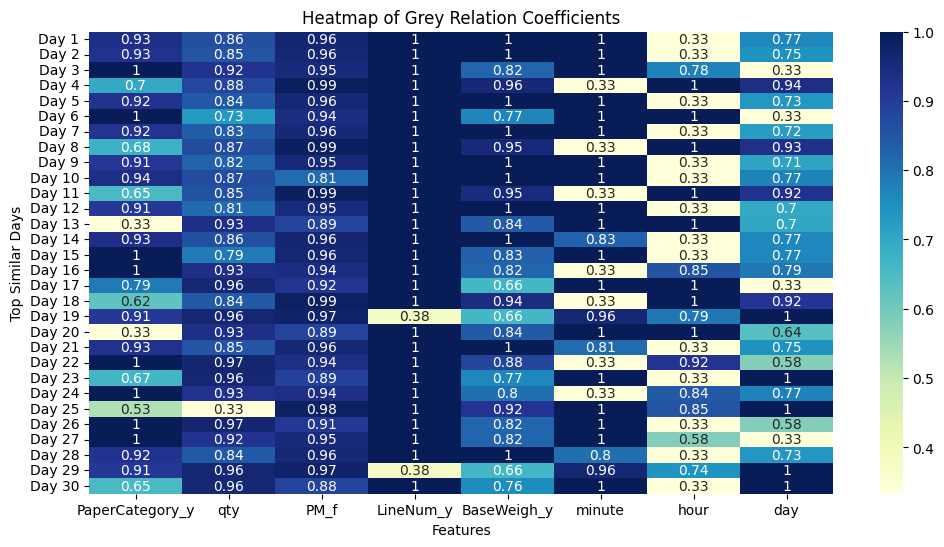

Các ngày tương tự nhất với ngày 25 tháng 6 năm 2024 trong tập train:
Ngày 2023-10-29 với độ tương quan xám: 0.8573
Ngày 2023-10-29 với độ tương quan xám: 0.8519
Ngày 2023-12-07 với độ tương quan xám: 0.8501
Ngày 2023-10-24 với độ tương quan xám: 0.8490
Ngày 2023-10-29 với độ tương quan xám: 0.8488
Ngày 2023-09-03 với độ tương quan xám: 0.8465
Ngày 2023-10-29 với độ tương quan xám: 0.8454
Ngày 2023-10-24 với độ tương quan xám: 0.8437
Ngày 2023-10-29 với độ tương quan xám: 0.8417
Ngày 2023-10-29 với độ tương quan xám: 0.8402
Ngày 2023-10-24 với độ tương quan xám: 0.8376
Ngày 2023-10-29 với độ tương quan xám: 0.8375
Ngày 2023-08-28 với độ tương quan xám: 0.8367
Ngày 2023-10-29 với độ tương quan xám: 0.8357
Ngày 2023-12-28 với độ tương quan xám: 0.8347
Ngày 2023-10-29 với độ tương quan xám: 0.8335
Ngày 2023-11-04 với độ tương quan xám: 0.8331
Ngày 2023-10-24 với độ tương quan xám: 0.8303
Ngày 2023-11-23 với độ tương quan xám: 0.8292
Ngày 2023-08-29 với độ tương quan xám: 0.8287
Ngày 2023-1

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu và chuẩn bị
data = pd.read_csv('/Users/nguyendinhhuy/Documents/NCKU/Code 2109 - 2024/testthudataa(1).csv')
data = data.sort_values(by='Time')
data['Time'] = pd.to_datetime(data['Time'])

# Xác định ngày mục tiêu
target_day = 25
target_month = 6
target_year = 2024

# Các đặc trưng cần tính toán độ quan hệ xám
target_features = ['PaperCategory_y', 'qty', 'PM_f','LineNum_y','BaseWeigh_y',
                   'minute','hour','day']
load_feature = 'PM'  # Tải điện tổng

# Chuẩn bị dữ liệu cho ngày mục tiêu và huấn luyện
train_data = data[data['Time'] < pd.Timestamp(f'{target_year}-01-01')]
test_data = data[data['Time'] >= pd.Timestamp(f'{target_year}-01-01')]

# Trích xuất dữ liệu ngày mục tiêu từ tập test
target_indices = test_data[(test_data['day'] == target_day) & 
                           (test_data['month'] == target_month) & 
                           (test_data['year'] == target_year)].index

if len(target_indices) > 0:
    target_day_data = test_data.loc[target_indices[0], target_features].values
else:
    raise ValueError("Không tìm thấy ngày mục tiêu trong tập test.")

# Chuẩn hóa dữ liệu sử dụng MinMaxScaler
scaler = MinMaxScaler()
X_train_features = scaler.fit_transform(train_data[target_features])
target_day_data = scaler.transform(target_day_data.reshape(1, -1))[0]

# Hàm tính độ quan hệ xám chuẩn theo bài báo
def calculate_grey_relation_degree(reference, comparison, rho=0.5):
    delta = np.abs(reference - comparison)
    min_delta = np.min(delta)
    max_delta = np.max(delta)
    grey_relation = (min_delta + rho * max_delta) / (delta + rho * max_delta)
    return grey_relation

# Tính toán độ quan hệ xám cho từng ngày trong tập huấn luyện
gra_values = np.array([calculate_grey_relation_degree(target_day_data, X_train_features[i]) for i in range(X_train_features.shape[0])])

# Tính trung bình các hệ số tương quan để đánh giá tổng thể
average_gra = np.mean(gra_values, axis=1)

# Sắp xếp và chọn các ngày tương tự nhất
sorted_indices = np.argsort(-average_gra)  # Sắp xếp giảm dần theo tương quan xám
top_similar_days = train_data.iloc[sorted_indices[:30]]  # Chọn 20 ngày tương tự nhất

# Vẽ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(gra_values[sorted_indices[:30]], 
                         index=[f'Day {i+1}' for i in range(30)], 
                         columns=target_features), annot=True, cmap='YlGnBu')
plt.title('Heatmap of Grey Relation Coefficients')
plt.xlabel('Features')
plt.ylabel('Top Similar Days')
plt.show()

# In ra danh sách các ngày tương tự nhất với mức độ tương quan
print("Các ngày tương tự nhất với ngày 25 tháng 6 năm 2024 trong tập train:")
for i, (idx, score) in enumerate(zip(sorted_indices[:30], average_gra[sorted_indices[:30]])):
    print(f"Ngày {train_data.iloc[idx]['Time'].date()} với độ tương quan xám: {score:.4f}")


## Eucledian

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch

# Đặt hạt giống để tái lập lại kết quả
np.random.seed(100)
torch.manual_seed(100)

# Đọc dữ liệu và chuẩn bị
data = pd.read_csv('/Users/nguyendinhhuy/Documents/NCKU/Code 2109 - 2024/testthudataa(1).csv')
data = data.sort_values(by='Time')

# Chuyển cột 'Time' thành datetime nếu chưa đúng định dạng
data['Time'] = pd.to_datetime(data['Time'])

# Thêm các cột 'year', 'day', và 'month' từ 'Time'
data['year'] = data['Time'].dt.year
data['day'] = data['Time'].dt.day
data['month'] = data['Time'].dt.month

# Định nghĩa các đặc trưng cần thiết
target_features = ['PaperCategory_y', 'qty', 'PM_f',
                   'LineNum_y', 'BaseWeigh_y']

# Chuẩn hóa dữ liệu
scaler_target = StandardScaler()
X_target = scaler_target.fit_transform(data[target_features])

# Chuyển đổi sang tensor
X_target = torch.tensor(X_target, dtype=torch.float32)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
total_samples = len(data)
train_percentage = 0.9

# Xác định kích thước tập huấn luyện và kiểm tra
train_size = int(total_samples * train_percentage)
test_size = total_samples - train_size

# Điều chỉnh kích thước tập huấn luyện để chia hết cho 288
train_size -= train_size % 288
test_size = total_samples - train_size

# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Kiểm tra và lọc các ngày có đủ 288 điểm trong tập huấn luyện
daily_counts_train = train_data.groupby(['year', 'month', 'day']).size()
complete_days_train = daily_counts_train[daily_counts_train == 288].index

# Lọc dữ liệu huấn luyện để chỉ bao gồm các ngày có đủ 288 điểm
train_data = train_data[train_data.set_index(['year', 'month', 'day']).index.isin(complete_days_train)]

# Chuẩn bị các đặc trưng huấn luyện và nhãn
X_target_train = scaler_target.fit_transform(train_data[target_features])

# Chuyển đổi sang tensor
X_target_train = torch.tensor(X_target_train, dtype=torch.float32)

# Xác định ngày mục tiêu
target_day = 25
target_month = 6
target_year = 2024

# Tìm các hàng trong tập kiểm tra cho ngày 1 tháng 6 năm 2024
target_indices = test_data[(test_data['day'] == target_day) & 
                           (test_data['month'] == target_month) & 
                           (test_data['year'] == target_year)].index

# Kiểm tra nếu có nhiều hơn một hàng phù hợp, chọn chỉ số phù hợp
if len(target_indices) > 1:
    print(f"Có nhiều hơn một hàng phù hợp: {target_indices}")

# Lấy dữ liệu ngày mục tiêu từ tập kiểm tra
target_day_data = X_target_train[target_indices[0] % 288].numpy()  # Lấy 288 điểm cho ngày mục tiêu

# Trích xuất các chỉ số của mỗi ngày trong tập huấn luyện
daily_indices_train = [train_data[(train_data['year'] == y) & 
                                  (train_data['month'] == m) & 
                                  (train_data['day'] == d)].index 
                       for y, m, d in complete_days_train]

# Hàm tính khoảng cách Euclidean cho tất cả 288 điểm của mỗi ngày
def calculate_daily_euclidean_distance(target_day_data, historical_data, daily_indices):
    daily_distances = []
    for indices in daily_indices:
        day_data = historical_data[indices]  # Lấy dữ liệu cho ngày hiện tại (288 điểm)
        distance = np.sqrt(np.sum((day_data - target_day_data) ** 2))  # Tính khoảng cách Euclidean
        daily_distances.append(distance)
    
    return np.array(daily_distances)

# Tính khoảng cách Euclidean giữa ngày mục tiêu và tất cả các ngày trong tập huấn luyện
distances = calculate_daily_euclidean_distance(target_day_data, X_target_train.numpy(), daily_indices_train)
n=70
# Sắp xếp và chọn ra các ngày tương tự nhất từ tập huấn luyện
sorted_indices = np.argsort(distances)
top_similar_days = [complete_days_train[idx] for idx in sorted_indices[:n]]  # Chọn ra 110 ngày tương tự nhất

# Sắp xếp các ngày tương tự theo thứ tự thời gian
top_similar_days_sorted = sorted(top_similar_days, key=lambda x: (x[0], x[1], x[2]))

# Hiển thị các ngày tương tự nhất từ tập huấn luyện theo thứ tự thời gian
print("Các ngày tương tự nhất với ngày 1 tháng 6 năm 2024 trong tập train (top 20, sắp xếp theo thời gian):")
for day in top_similar_days_sorted[:n]:
    print(f"Ngày tương tự {day} với khoảng cách: {distances[sorted_indices[top_similar_days.index(day)]]:.4f}")

# Kiểm tra và xác nhận các ngày có đủ 288 điểm dữ liệu
valid_days = [day for day in top_similar_days_sorted if len(train_data[(train_data['year'] == day[0]) & 
                                                                       (train_data['month'] == day[1]) & 
                                                                        (train_data['day'] == day[2])]) == 288]

if valid_days:
    print("Các ngày có đủ 288 điểm dữ liệu:")
    for day in valid_days:
        print(f"Ngày {day} trong tập train với khoảng cách: {distances[sorted_indices[top_similar_days.index(day)]]:.4f}")
else:
    print("Không có ngày nào có đủ 288 điểm dữ liệu.")


Có nhiều hơn một hàng phù hợp: Index([63360, 63361, 63362, 63363, 63364, 63365, 63366, 63367, 63368, 63369,
       ...
       63638, 63639, 63640, 63641, 63642, 63643, 63644, 63645, 63646, 63647],
      dtype='int64', length=288)
Các ngày tương tự nhất với ngày 1 tháng 6 năm 2024 trong tập train (top 20, sắp xếp theo thời gian):
Ngày tương tự (2023, 7, 28) với khoảng cách: 51.6547
Ngày tương tự (2023, 7, 29) với khoảng cách: 53.6336
Ngày tương tự (2023, 7, 31) với khoảng cách: 53.9898
Ngày tương tự (2023, 8, 3) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 4) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 5) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 6) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 7) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 8) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 9) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 11) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 12) với khoảng cách: 60.2264
Ngày tương tự (2023, 8, 13) với khoảng c

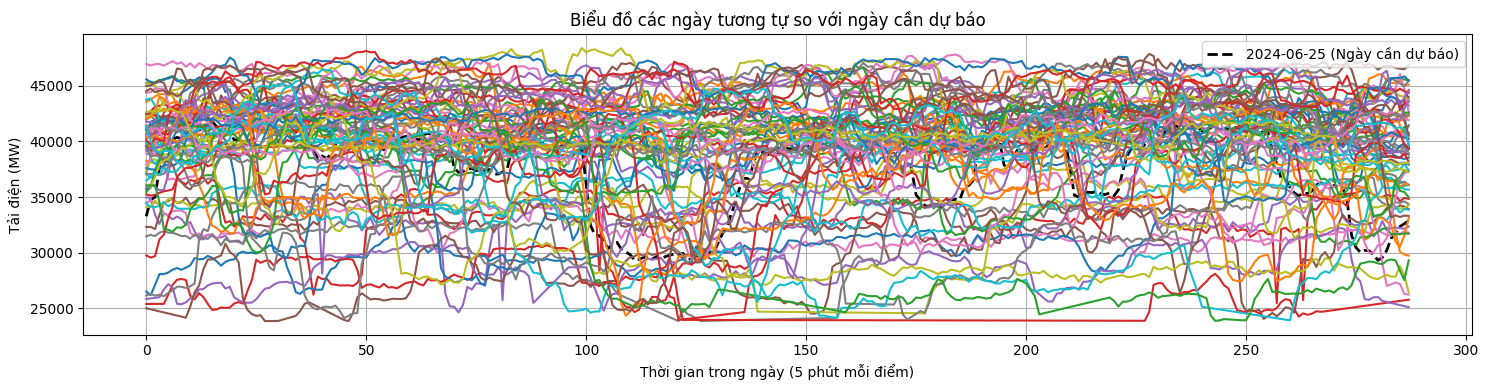

In [8]:
import matplotlib.pyplot as plt

# Hàm vẽ biểu đồ các ngày tương tự
def plot_similar_days(train_data, similar_days, target_day_data, target_day_label):
    plt.figure(figsize=(15,4))
    
    # Vẽ dữ liệu của ngày cần dự báo
    plt.plot(range(288), target_day_data, label=f'{target_day_label} (Ngày cần dự báo)', linewidth=2, linestyle='--', color='black')
    
    # Vẽ dữ liệu của các ngày tương tự
    for day in similar_days:
        day_data = train_data[(train_data['year'] == day[0]) & 
                              (train_data['month'] == day[1]) & 
                              (train_data['day'] == day[2])]
        load_values = day_data['PM'].values  # Điều chỉnh tên cột nếu cần thiết
        label = f'{day[0]}-{day[1]:02d}-{day[2]:02d}'  # Định dạng ngày tháng năm
        
        plt.plot(range(288), load_values)
        # plt.plot(range(288), load_values, label=label)

    
    plt.title('Biểu đồ các ngày tương tự so với ngày cần dự báo')
    plt.xlabel('Thời gian trong ngày (5 phút mỗi điểm)')
    plt.ylabel('Tải điện (MW)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Chuẩn bị dữ liệu của ngày cần dự báo
target_day_label = f'{target_year}-{target_month:02d}-{target_day:02d}'
target_day_load_values = test_data.loc[target_indices, 'PM'].values  # Điều chỉnh tên cột nếu cần thiết

# Gọi hàm vẽ các ngày tương tự
plot_similar_days(train_data, top_similar_days_sorted, target_day_load_values, target_day_label)


In [9]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import random

# Đặt seed để đảm bảo tính tái lập của kết quả
random.seed(100)
np.random.seed(100)
torch.manual_seed(100)
torch.cuda.manual_seed(100)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Giả sử `top_similar_days_sorted` chứa các ngày tương tự đã sắp xếp theo thời gian
# Lấy chỉ số của các ngày tương tự từ tập train
similar_day_indices = []

for day in top_similar_days_sorted:
    indices = train_data[(train_data['year'] == day[0]) & 
                         (train_data['month'] == day[1]) & 
                         (train_data['day'] == day[2])].index
    similar_day_indices.extend(indices)

# Chuẩn bị dữ liệu cho mô hình từ các ngày tương tự
X_encoder_train = X_encoder[similar_day_indices]
X_pm_train = X_pm[similar_day_indices]
X_pm_steam_train = X_pm_steam[similar_day_indices]
y_train = y[similar_day_indices]
# Kiểm tra shape của dữ liệu huấn luyện
print("Shape of X_encoder_train:", X_encoder_train.shape)
print("Shape of X_pm_train:", X_pm_train.shape)
print("Shape of X_pm_steam_train:", X_pm_steam_train.shape)
print("Shape of y_train:", y_train.shape)


# Tạo TensorDataset cho tập train với các ngày tương tự
train_dataset = TensorDataset(X_encoder_train, X_pm_train, X_pm_steam_train, y_train)

# DataLoader cho tập train
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Định nghĩa lớp Encoder cho mô hình Transformer
class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.1):
        super(Encoder, self).__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.encoder(x)
        return self.norm(x)

# Định nghĩa lớp Decoder cho mô hình Transformer
class Decoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.2):
        super(Decoder, self).__init__()
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)
        self.output_layer = nn.Linear(d_model, 1)  # Output là một scalar cho mỗi thời điểm

    def forward(self, memory, x):
        x = self.decoder(x, memory)
        x = self.norm(x)
        x = self.output_layer(x)
        return x

# Định nghĩa mô hình MultiDeT với hai Decoder cho hai loại tải
class MultiDeT(nn.Module):
    def __init__(self, encoder_layers=1, decoder_layers=1, d_model=16, dropout=0.2):
        super(MultiDeT, self).__init__()
        self.encoder = Encoder(encoder_layers, d_model=d_model, dropout=dropout)
        self.decoder1 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)
        self.decoder2 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)

        self.encoderLinear = nn.Sequential(
            nn.Linear(len(encoder_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder1_Linear = nn.Sequential(
            nn.Linear(len(pm_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder2_Linear = nn.Sequential(
            nn.Linear(len(pm_steam_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )

    def forward(self, src, src_dec1, src_dec2):
        encoder_output = self.encoder(self.encoderLinear(src))

        decoder1_output = self.decoder1(encoder_output, self.decoder1_Linear(src_dec1))
        decoder2_output = self.decoder2(encoder_output, self.decoder2_Linear(src_dec2))

        return decoder1_output, decoder2_output

# Khởi tạo mô hình Transformer (MultiDeT)
model = MultiDeT(encoder_layers=1, decoder_layers=1, d_model=16, dropout=0.2)

# Định nghĩa hàm loss và optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=5e-3)  # Sử dụng AdamW optimizer
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=10, verbose=True)

# Hàm huấn luyện mô hình
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X_enc, X_pm, X_pm_steam, y in train_loader:
            optimizer.zero_grad()
            output1, output2 = model(X_enc, X_pm, X_pm_steam)

            # Reshape outputs to match the target shape
            output1 = output1.view(-1)
            output2 = output2.view(-1)

            # Calculate loss for each output
            loss1 = criterion(output1, y[:, 0])
            loss2 = criterion(output2, y[:, 1])

            # Combine the losses
            loss = 0.8*loss1 + 0.2*loss2
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_enc.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}')

        # Step the scheduler
        scheduler.step(epoch_loss)

    return train_losses

# Huấn luyện mô hình với tập dữ liệu từ các ngày tương tự
train_losses = train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50)

# Tạo tập test cho đánh giá
# Thay đổi phần này để chỉ dự báo cho ngày đã chỉ định trước đó trong tập test
test_day = 25
test_month = 6
test_year = 2024

# Tìm chỉ số của ngày cần dự báo trong tập test
test_indices = test_data[(test_data['day'] == test_day) & 
                        (test_data['month'] == test_month) & 
                        (test_data['year'] == test_year)].index

# Đảm bảo có đủ 288 điểm dữ liệu cho ngày này
if len(test_indices) == 288:
    print(f"Dự báo cho ngày {test_day}/{test_month}/{test_year}")

    # Chuẩn bị dữ liệu cho mô hình từ ngày cần dự báo
    X_encoder_test = X_encoder[test_indices]
    X_pm_test = X_pm[test_indices]
    X_pm_steam_test = X_pm_steam[test_indices]
    y_test = y[test_indices]

    # Tạo TensorDataset cho tập test
    test_dataset = TensorDataset(X_encoder_test, X_pm_test, X_pm_steam_test, y_test)

    # DataLoader cho tập test
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Đánh giá mô hình với tập test
    def evaluate_model(model, test_loader, criterion, scaler_y):
        model.eval()
        test_loss = 0.0
        true_values_pm = []
        true_values_pm_steam = []
        predicted_values_pm = []
        predicted_values_pm_steam = []

        with torch.no_grad():
            for X_enc, X_pm, X_pm_steam, y in test_loader:
                output1, output2 = model(X_enc, X_pm, X_pm_steam)

                # Reshape outputs to match the target shape
                output1 = output1.view(-1)
                output2 = output2.view(-1)

                # Calculate loss for each output
                loss1 = criterion(output1, y[:, 0])
                loss2 = criterion(output2, y[:, 1])
                loss =  0.8*loss1 + 0.2*loss2  # Sử dụng cùng trọng số như trong quá trình huấn luyện
                test_loss += loss.item() * X_enc.size(0)

                true_values_pm.extend(y[:, 0].cpu().numpy())
                true_values_pm_steam.extend(y[:, 1].cpu().numpy())
                predicted_values_pm.extend(output1.cpu().numpy())
                predicted_values_pm_steam.extend(output2.cpu().numpy())

        test_loss = test_loss / len(test_loader.dataset)
        print(f'Test Loss: {test_loss:.4f}')

        # Convert lists to numpy arrays
        true_values_pm = np.array(true_values_pm)
        true_values_pm_steam = np.array(true_values_pm_steam)
        predicted_values_pm = np.array(predicted_values_pm)
        predicted_values_pm_steam = np.array(predicted_values_pm_steam)

        # Inverse transform the predictions and true values to their original scale
        true_values = scaler_y.inverse_transform(np.vstack((true_values_pm, true_values_pm_steam)).T)
        predicted_values = scaler_y.inverse_transform(np.vstack((predicted_values_pm, predicted_values_pm_steam)).T)

        true_values_pm = true_values[:, 0]
        true_values_pm_steam = true_values[:, 1]
        predicted_values_pm = predicted_values[:, 0]
        predicted_values_pm_steam = predicted_values[:, 1]

        # Calculate Mean Absolute Percentage Error (MAPE)
        mape_pm = np.mean(np.abs((true_values_pm - predicted_values_pm) / true_values_pm)) * 100
        mape_pm_steam = np.mean(np.abs((true_values_pm_steam - predicted_values_pm_steam) / true_values_pm_steam)) * 100

        print(f'MAPE for PM: {mape_pm:.2f}%')
        print(f'MAPE for PM_steam: {mape_pm_steam:.2f}%')

        return true_values_pm, true_values_pm_steam, predicted_values_pm, predicted_values_pm_steam, mape_pm, mape_pm_steam

    # Đánh giá mô hình với tập test
    true_values_pm, true_values_pm_steam, predicted_values_pm, predicted_values_pm_steam, mape_pm, mape_pm_steam = evaluate_model(model, test_loader, criterion, scaler_y)

    # Vẽ biểu đồ dự báo và giá trị thực cho PM
    plt.figure(figsize=(15, 3))
    plt.plot(true_values_pm, label='True PM')
    plt.plot(predicted_values_pm, label='Predicted PM')
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=16)

    plt.xlabel('Time (5-min interval)', fontsize=20)
    plt.ylabel('PM (W)', fontsize=20)
    plt.title(f'Dự báo PM cho ngày {test_day}/{test_month}/{test_year}')
    plt.legend()
    plt.show()

    # Vẽ biểu đồ dự báo và giá trị thực cho PM_steam
    plt.figure(figsize=(15, 3))
    plt.plot(true_values_pm_steam, label='True PM_steam')
    plt.plot(predicted_values_pm_steam, label='Predicted PM_steam')
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.xlabel('Time (5-min interval)', fontsize=20)
    plt.ylabel('PM_steam (ton/h)', fontsize=20)
    plt.title(f'Dự báo PM_steam cho ngày {test_day}/{test_month}/{test_year}')
    plt.legend()
    plt.show()
else:
    print(f"Không đủ 288 điểm dữ liệu cho ngày {test_day}/{test_month}/{test_year}")


Shape of X_encoder_train: torch.Size([20160, 23])
Shape of X_pm_train: torch.Size([20160, 17])
Shape of X_pm_steam_train: torch.Size([20160, 17])
Shape of y_train: torch.Size([20160, 2])


/Users/nguyendinhhuy/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Users/nguyendinhhuy/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50, Training Loss: 0.7162


KeyboardInterrupt: 

## **Manhattan (Manhattan Distance)**

Các ngày tương tự nhất với ngày 1 tháng 6 năm 2024 trong tập train (top 20, sắp xếp theo thời gian):
Ngày tương tự (2023, 7, 28) với khoảng cách: 1462.6318
Ngày tương tự (2023, 7, 29) với khoảng cách: 1645.0518
Ngày tương tự (2023, 7, 31) với khoảng cách: 1711.9893
Ngày tương tự (2023, 9, 3) với khoảng cách: 1809.5312
Ngày tương tự (2023, 10, 16) với khoảng cách: 1811.9087
Ngày tương tự (2023, 10, 21) với khoảng cách: 1615.4263
Ngày tương tự (2023, 10, 22) với khoảng cách: 1545.7675
Ngày tương tự (2023, 10, 23) với khoảng cách: 1667.5835
Ngày tương tự (2023, 10, 24) với khoảng cách: 1676.0449
Ngày tương tự (2023, 10, 29) với khoảng cách: 1757.7327
Ngày tương tự (2023, 11, 3) với khoảng cách: 1787.2593
Ngày tương tự (2023, 11, 4) với khoảng cách: 1539.6805
Ngày tương tự (2023, 11, 5) với khoảng cách: 1474.7129
Ngày tương tự (2023, 11, 13) với khoảng cách: 1655.1802
Ngày tương tự (2023, 11, 14) với khoảng cách: 1719.8245
Ngày tương tự (2023, 11, 28) với khoảng cách: 1679.0732
Ngày tương 

/var/folders/cm/nfg3lzjx1yb8gh0lpqtj20zc0000gn/T/ipykernel_7092/1647899361.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


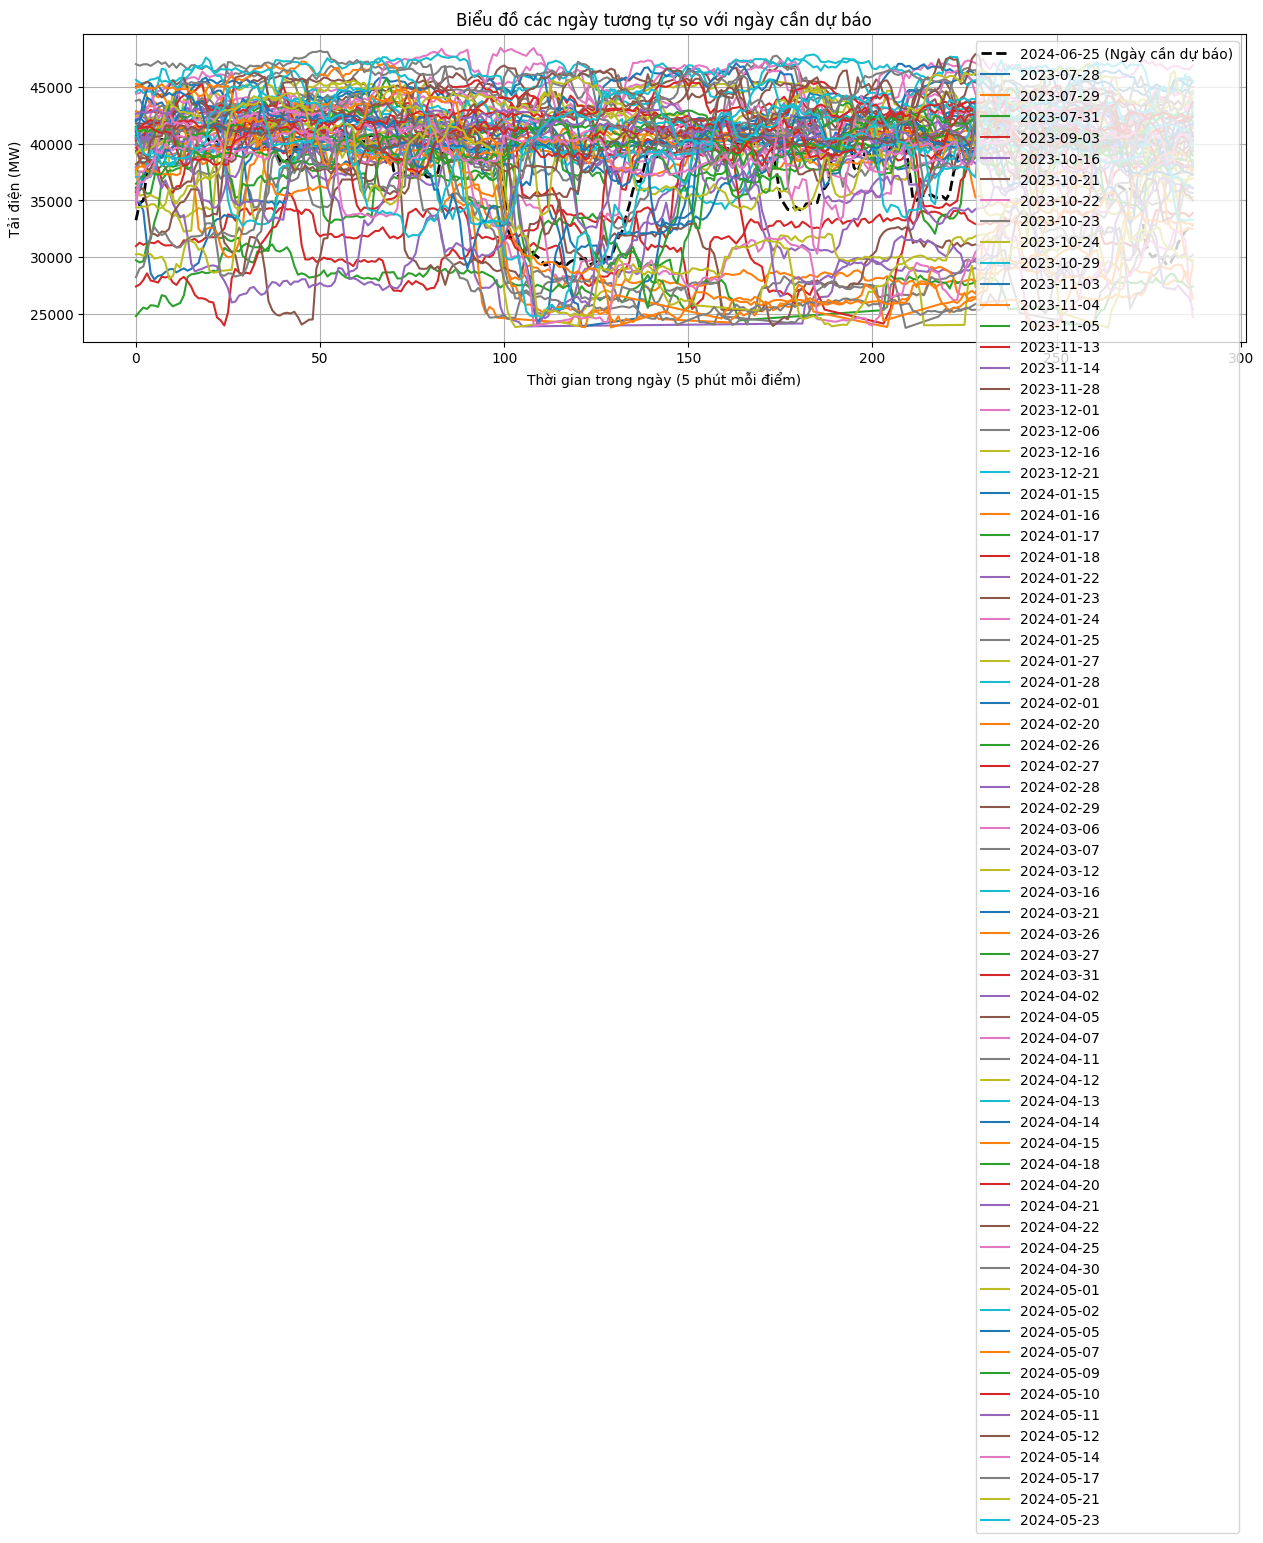

/Users/nguyendinhhuy/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Training Loss: 0.8109
Epoch 2/50, Training Loss: 0.7224
Epoch 3/50, Training Loss: 0.6843
Epoch 4/50, Training Loss: 0.6486
Epoch 5/50, Training Loss: 0.6169
Epoch 6/50, Training Loss: 0.5955
Epoch 7/50, Training Loss: 0.5721
Epoch 8/50, Training Loss: 0.5552
Epoch 9/50, Training Loss: 0.5415
Epoch 10/50, Training Loss: 0.5263
Epoch 11/50, Training Loss: 0.5089
Epoch 12/50, Training Loss: 0.5007
Epoch 13/50, Training Loss: 0.4887
Epoch 14/50, Training Loss: 0.4770
Epoch 15/50, Training Loss: 0.4662
Epoch 16/50, Training Loss: 0.4569
Epoch 17/50, Training Loss: 0.4540
Epoch 18/50, Training Loss: 0.4369
Epoch 19/50, Training Loss: 0.4335
Epoch 20/50, Training Loss: 0.4265
Epoch 21/50, Training Loss: 0.4139
Epoch 22/50, Training Loss: 0.4096
Epoch 23/50, Training Loss: 0.4039
Epoch 24/50, Training Loss: 0.3999
Epoch 25/50, Training Loss: 0.3874
Epoch 26/50, Training Loss: 0.3847
Epoch 27/50, Training Loss: 0.3806
Epoch 28/50, Training Loss: 0.3757
Epoch 29/50, Training Loss: 0

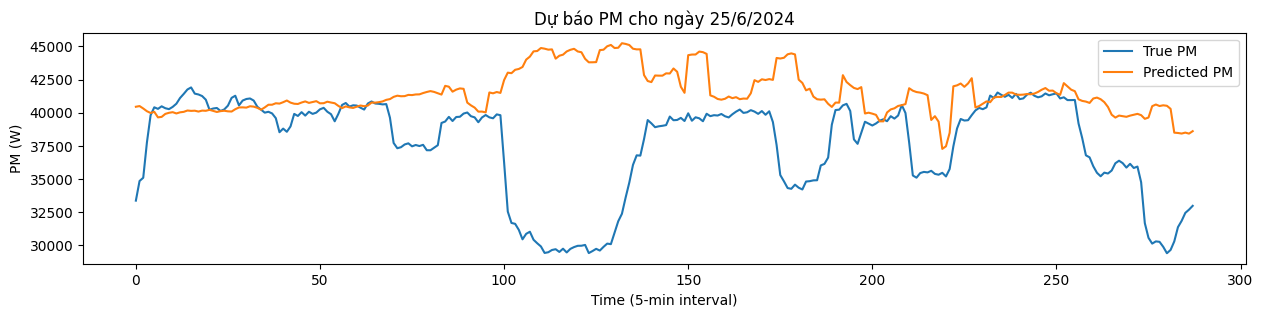

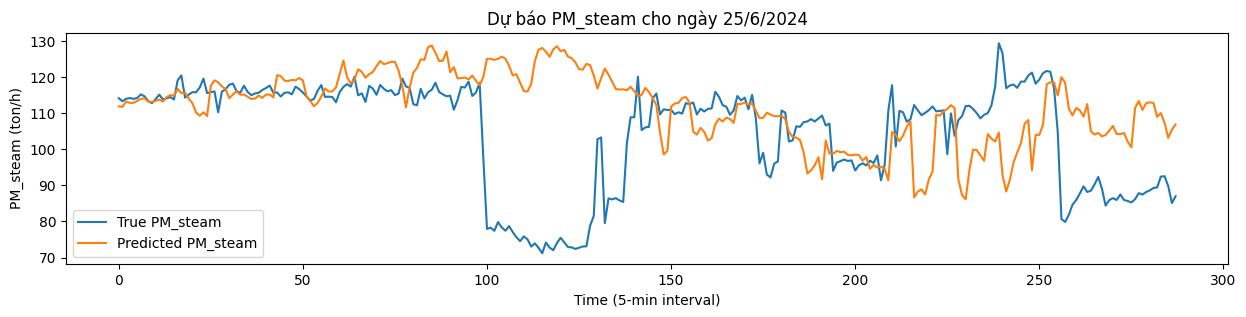

In [10]:
# Hàm tính khoảng cách Manhattan cho tất cả 288 điểm của mỗi ngày
def calculate_daily_manhattan_distance(target_day_data, historical_data, daily_indices):
    daily_distances = []
    for indices in daily_indices:
        day_data = historical_data[indices]  # Lấy dữ liệu cho ngày hiện tại (288 điểm)
        distance = np.sum(np.abs(day_data - target_day_data))  # Tính khoảng cách Manhattan
        daily_distances.append(distance)
    
    return np.array(daily_distances)

# Tính khoảng cách Manhattan giữa ngày mục tiêu và tất cả các ngày trong tập huấn luyện
distances = calculate_daily_manhattan_distance(target_day_data, X_target_train.numpy(), daily_indices_train)
n=70
# Sắp xếp và chọn ra các ngày tương tự nhất từ tập huấn luyện
sorted_indices = np.argsort(distances)
top_similar_days = [complete_days_train[idx] for idx in sorted_indices[:n]]  # Chọn ra 110 ngày tương tự nhất

# Sắp xếp các ngày tương tự theo thứ tự thời gian
top_similar_days_sorted = sorted(top_similar_days, key=lambda x: (x[0], x[1], x[2]))

# Hiển thị các ngày tương tự nhất từ tập huấn luyện theo thứ tự thời gian
print("Các ngày tương tự nhất với ngày 1 tháng 6 năm 2024 trong tập train (top 20, sắp xếp theo thời gian):")
for day in top_similar_days_sorted[:n]:
    print(f"Ngày tương tự {day} với khoảng cách: {distances[sorted_indices[top_similar_days.index(day)]]:.4f}")

# Kiểm tra và xác nhận các ngày có đủ 288 điểm dữ liệu
valid_days = [day for day in top_similar_days_sorted if len(train_data[(train_data['year'] == day[0]) & 
                                                                       (train_data['month'] == day[1]) & 
                                                                        (train_data['day'] == day[2])]) == 288]

if valid_days:
    print("Các ngày có đủ 288 điểm dữ liệu:")
    for day in valid_days:
        print(f"Ngày {day} trong tập train với khoảng cách: {distances[sorted_indices[top_similar_days.index(day)]]:.4f}")
else:
    print("Không có ngày nào có đủ 288 điểm dữ liệu.")

import matplotlib.pyplot as plt

# Hàm vẽ biểu đồ các ngày tương tự
def plot_similar_days(train_data, similar_days, target_day_data, target_day_label):
    plt.figure(figsize=(15, 4))
    
    # Vẽ dữ liệu của ngày cần dự báo
    plt.plot(range(288), target_day_data, label=f'{target_day_label} (Ngày cần dự báo)', linewidth=2, linestyle='--', color='black')
    
    # Vẽ dữ liệu của các ngày tương tự
    for day in similar_days:
        day_data = train_data[(train_data['year'] == day[0]) & 
                              (train_data['month'] == day[1]) & 
                              (train_data['day'] == day[2])]
        load_values = day_data['PM'].values  # Điều chỉnh tên cột nếu cần thiết
        label = f'{day[0]}-{day[1]:02d}-{day[2]:02d}'  # Định dạng ngày tháng năm
        
        plt.plot(range(288), load_values, label=label)
    
    plt.title('Biểu đồ các ngày tương tự so với ngày cần dự báo')
    plt.xlabel('Thời gian trong ngày (5 phút mỗi điểm)')
    plt.ylabel('Tải điện (MW)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Chuẩn bị dữ liệu của ngày cần dự báo
target_day_label = f'{target_year}-{target_month:02d}-{target_day:02d}'
target_day_load_values = test_data.loc[target_indices, 'PM'].values  # Điều chỉnh tên cột nếu cần thiết

# Gọi hàm vẽ các ngày tương tự
plot_similar_days(train_data, top_similar_days_sorted, target_day_load_values, target_day_label)


import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import random

# Đặt seed để đảm bảo tính tái lập của kết quả
random.seed(100)
np.random.seed(100)
torch.manual_seed(100)
torch.cuda.manual_seed(100)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Lấy chỉ số của các ngày tương tự từ tập train
similar_day_indices = []

for day in top_similar_days_sorted:
    indices = train_data[(train_data['year'] == day[0]) & 
                         (train_data['month'] == day[1]) & 
                         (train_data['day'] == day[2])].index
    similar_day_indices.extend(indices)

# Chuẩn bị dữ liệu cho mô hình từ các ngày tương tự
X_encoder_train = X_encoder[similar_day_indices]
X_pm_train = X_pm[similar_day_indices]
X_pm_steam_train = X_pm_steam[similar_day_indices]
y_train = y[similar_day_indices]

# Tạo TensorDataset cho tập train với các ngày tương tự
train_dataset = TensorDataset(X_encoder_train, X_pm_train, X_pm_steam_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Định nghĩa lớp Encoder cho mô hình Transformer
class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.1):
        super(Encoder, self).__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.encoder(x)
        return self.norm(x)

# Định nghĩa lớp Decoder cho mô hình Transformer
class Decoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.2):
        super(Decoder, self).__init__()
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)
        self.output_layer = nn.Linear(d_model, 1)  # Output là một scalar cho mỗi thời điểm

    def forward(self, memory, x):
        x = self.decoder(x, memory)
        x = self.norm(x)
        x = self.output_layer(x)
        return x

# Định nghĩa mô hình MultiDeT với hai Decoder cho hai loại tải
class MultiDeT(nn.Module):
    def __init__(self, encoder_layers=1, decoder_layers=1, d_model=16, dropout=0.2):
        super(MultiDeT, self).__init__()
        self.encoder = Encoder(encoder_layers, d_model=d_model, dropout=dropout)
        self.decoder1 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)
        self.decoder2 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)

        self.encoderLinear = nn.Sequential(
            nn.Linear(len(encoder_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder1_Linear = nn.Sequential(
            nn.Linear(len(pm_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder2_Linear = nn.Sequential(
            nn.Linear(len(pm_steam_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )

    def forward(self, src, src_dec1, src_dec2):
        encoder_output = self.encoder(self.encoderLinear(src))

        decoder1_output = self.decoder1(encoder_output, self.decoder1_Linear(src_dec1))
        decoder2_output = self.decoder2(encoder_output, self.decoder2_Linear(src_dec2))

        return decoder1_output, decoder2_output

# Khởi tạo mô hình Transformer (MultiDeT)
model = MultiDeT(encoder_layers=1, decoder_layers=1, d_model=16, dropout=0.2)

# Định nghĩa hàm loss và optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=5e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=10, verbose=True)

# Hàm huấn luyện mô hình
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X_enc, X_pm, X_pm_steam, y in train_loader:
            optimizer.zero_grad()
            output1, output2 = model(X_enc, X_pm, X_pm_steam)

            # Reshape outputs to match the target shape
            output1 = output1.view(-1)
            output2 = output2.view(-1)

            # Calculate loss for each output
            loss1 = criterion(output1, y[:, 0])
            loss2 = criterion(output2, y[:, 1])

            # Combine the losses
            loss = 0.8 * loss1 + 0.2 * loss2
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_enc.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}')
        scheduler.step(epoch_loss)

    return train_losses

# Huấn luyện mô hình với tập dữ liệu từ các ngày tương tự
train_losses = train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50)


# Tạo tập test cho đánh giá
test_day = 25
test_month = 6
test_year = 2024

# Tìm chỉ số của ngày cần dự báo trong tập test
test_indices = test_data[(test_data['day'] == test_day) & 
                         (test_data['month'] == test_month) & 
                         (test_data['year'] == test_year)].index

# Đảm bảo có đủ 288 điểm dữ liệu cho ngày này
if len(test_indices) == 288:
    print(f"Dự báo cho ngày {test_day}/{test_month}/{test_year}")

    X_encoder_test = X_encoder[test_indices]
    X_pm_test = X_pm[test_indices]
    X_pm_steam_test = X_pm_steam[test_indices]
    y_test = y[test_indices]

    test_dataset = TensorDataset(X_encoder_test, X_pm_test, X_pm_steam_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Đánh giá mô hình
    def evaluate_model(model, test_loader, criterion, scaler_y):
        model.eval()
        test_loss = 0.0
        true_values_pm = []
        true_values_pm_steam = []
        predicted_values_pm = []
        predicted_values_pm_steam = []

        with torch.no_grad():
            for X_enc, X_pm, X_pm_steam, y in test_loader:
                output1, output2 = model(X_enc, X_pm, X_pm_steam)

                output1 = output1.view(-1)
                output2 = output2.view(-1)

                loss1 = criterion(output1, y[:, 0])
                loss2 = criterion(output2, y[:, 1])
                loss = 0.8 * loss1 + 0.2 * loss2
                test_loss += loss.item() * X_enc.size(0)

                true_values_pm.extend(y[:, 0].cpu().numpy())
                true_values_pm_steam.extend(y[:, 1].cpu().numpy())
                predicted_values_pm.extend(output1.cpu().numpy())
                predicted_values_pm_steam.extend(output2.cpu().numpy())

        test_loss = test_loss / len(test_loader.dataset)
        print(f'Test Loss: {test_loss:.4f}')

        true_values_pm = np.array(true_values_pm)
        true_values_pm_steam = np.array(true_values_pm_steam)
        predicted_values_pm = np.array(predicted_values_pm)
        predicted_values_pm_steam = np.array(predicted_values_pm_steam)

        true_values = scaler_y.inverse_transform(np.vstack((true_values_pm, true_values_pm_steam)).T)
        predicted_values = scaler_y.inverse_transform(np.vstack((predicted_values_pm, predicted_values_pm_steam)).T)

        true_values_pm = true_values[:, 0]
        true_values_pm_steam = true_values[:, 1]
        predicted_values_pm = predicted_values[:, 0]
        predicted_values_pm_steam = predicted_values[:, 1]

        mape_pm = np.mean(np.abs((true_values_pm - predicted_values_pm) / true_values_pm)) * 100
        mape_pm_steam = np.mean(np.abs((true_values_pm_steam - predicted_values_pm_steam) / true_values_pm_steam)) * 100

        print(f'MAPE for PM: {mape_pm:.2f}%')
        print(f'MAPE for PM_steam: {mape_pm_steam:.2f}%')

        return true_values_pm, true_values_pm_steam, predicted_values_pm, predicted_values_pm_steam, mape_pm, mape_pm_steam

    # Đánh giá mô hình với tập test
    true_values_pm, true_values_pm_steam, predicted_values_pm, predicted_values_pm_steam, mape_pm, mape_pm_steam = evaluate_model(model, test_loader, criterion, scaler_y)

    # Vẽ biểu đồ dự báo và giá trị thực cho PM
    plt.figure(figsize=(15, 3))
    plt.plot(true_values_pm, label='True PM')
    plt.plot(predicted_values_pm, label='Predicted PM')
    plt.xlabel('Time (5-min interval)')
    plt.ylabel('PM (W)')
    plt.title(f'Dự báo PM cho ngày {test_day}/{test_month}/{test_year}')
    plt.legend()
    plt.show()

    # Vẽ biểu đồ dự báo và giá trị thực cho PM_steam
    plt.figure(figsize=(15, 3))
    plt.plot(true_values_pm_steam, label='True PM_steam')
    plt.plot(predicted_values_pm_steam, label='Predicted PM_steam')
    plt.xlabel('Time (5-min interval)')
    plt.ylabel('PM_steam (ton/h)')
    plt.title(f'Dự báo PM_steam cho ngày {test_day}/{test_month}/{test_year}')
    plt.legend()
    plt.show()
else:
    print(f"Không đủ 288 điểm dữ liệu cho ngày {test_day}/{test_month}/{test_year}")





## **Cosine Similarity**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import random

# 1. Hàm tính Cosine Similarity cho tất cả 288 điểm của mỗi ngày
def calculate_daily_cosine_similarity(target_day_data, historical_data, daily_indices):
    daily_similarities = []
    for indices in daily_indices:
        day_data = historical_data[indices]  # Lấy dữ liệu cho ngày hiện tại (288 điểm)
        
        # Tính Cosine Similarity
        dot_product = np.dot(day_data, target_day_data)
        norm_day_data = np.linalg.norm(day_data)
        norm_target_data = np.linalg.norm(target_day_data)
        
        similarity = dot_product / (norm_day_data * norm_target_data)  # Cosine Similarity
        daily_similarities.append(similarity)
    
    return np.array(daily_similarities)

# 2. Tính Cosine Similarity giữa ngày mục tiêu và tất cả các ngày trong tập huấn luyện
similarities = calculate_daily_cosine_similarity(target_day_data, X_target_train.numpy(), daily_indices_train)
# Đảm bảo rằng n không vượt quá số ngày có sẵn trong complete_days_train
n = min(n, len(complete_days_train))  # Đảm bảo n không lớn hơn số ngày có trong complete_days_train

# Sắp xếp và chọn ra các ngày tương tự nhất từ tập huấn luyện
sorted_indices = np.argsort(similarities)[::-1]  # Sắp xếp giảm dần

# Chỉ chọn những ngày có trong complete_days_train
top_similar_days = [complete_days_train[idx] for idx in sorted_indices if idx < len(complete_days_train)][:n]  # Chọn ra n ngày tương tự nhất


# Sắp xếp các ngày tương tự theo thứ tự thời gian
top_similar_days_sorted = sorted(top_similar_days, key=lambda x: (x[0], x[1], x[2]))

# Hiển thị các ngày tương tự nhất từ tập huấn luyện theo thứ tự thời gian
print("Các ngày tương tự nhất với ngày 1 tháng 6 năm 2024 trong tập train (top 20, sắp xếp theo thời gian):")
for day in top_similar_days_sorted[:n]:
    print(f"Ngày tương tự {day} với Cosine Similarity: {similarities[sorted_indices[top_similar_days.index(day)]]:.4f}")

# Kiểm tra và xác nhận các ngày có đủ 288 điểm dữ liệu
valid_days = [day for day in top_similar_days_sorted if len(train_data[(train_data['year'] == day[0]) & 
                                                                       (train_data['month'] == day[1]) & 
                                                                       (train_data['day'] == day[2])]) == 288]

if valid_days:
    print("Các ngày có đủ 288 điểm dữ liệu:")
    for day in valid_days:
        print(f"Ngày {day} trong tập train với Cosine Similarity: {similarities[sorted_indices[top_similar_days.index(day)]]:.4f}")
else:
    print("Không có ngày nào có đủ 288 điểm dữ liệu.")

# 3. Hàm vẽ biểu đồ các ngày tương tự
def plot_similar_days(train_data, similar_days, target_day_data, target_day_label):
    plt.figure(figsize=(15, 4))
    
    # Vẽ dữ liệu của ngày cần dự báo
    plt.plot(range(288), target_day_data, label=f'{target_day_label} (Ngày cần dự báo)', linewidth=2, linestyle='--', color='black')
    
    # Vẽ dữ liệu của các ngày tương tự
    for day in similar_days:
        day_data = train_data[(train_data['year'] == day[0]) & 
                              (train_data['month'] == day[1]) & 
                              (train_data['day'] == day[2])]
        load_values = day_data['PM'].values  # Điều chỉnh tên cột nếu cần thiết
        label = f'{day[0]}-{day[1]:02d}-{day[2]:02d}'  # Định dạng ngày tháng năm
        
        plt.plot(range(288), load_values, label=label)
    
    plt.title('Biểu đồ các ngày tương tự so với ngày cần dự báo')
    plt.xlabel('Thời gian trong ngày (5 phút mỗi điểm)')
    plt.ylabel('Tải điện (MW)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Chuẩn bị dữ liệu của ngày cần dự báo
target_day_label = f'{target_year}-{target_month:02d}-{target_day:02d}'
target_day_load_values = test_data.loc[target_indices, 'PM'].values  # Điều chỉnh tên cột nếu cần thiết

# Gọi hàm vẽ các ngày tương tự
plot_similar_days(train_data, top_similar_days_sorted, target_day_load_values, target_day_label)

# 4. Huấn luyện mô hình với các ngày tương tự

# Đặt seed để đảm bảo tính tái lập của kết quả
random.seed(100)
np.random.seed(100)
torch.manual_seed(100)
torch.cuda.manual_seed(100)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Lấy chỉ số của các ngày tương tự từ tập train
similar_day_indices = []

for day in top_similar_days_sorted:
    indices = train_data[(train_data['year'] == day[0]) & 
                         (train_data['month'] == day[1]) & 
                         (train_data['day'] == day[2])].index
    similar_day_indices.extend(indices)

# Chuẩn bị dữ liệu cho mô hình từ các ngày tương tự
X_encoder_train = X_encoder[similar_day_indices]
X_pm_train = X_pm[similar_day_indices]
X_pm_steam_train = X_pm_steam[similar_day_indices]
y_train = y[similar_day_indices]

# Tạo TensorDataset cho tập train với các ngày tương tự
train_dataset = TensorDataset(X_encoder_train, X_pm_train, X_pm_steam_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Định nghĩa lớp Encoder cho mô hình Transformer
class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.1):
        super(Encoder, self).__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.encoder(x)
        return self.norm(x)

# Định nghĩa lớp Decoder cho mô hình Transformer
class Decoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.2):
        super(Decoder, self).__init__()
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)
        self.output_layer = nn.Linear(d_model, 1)  # Output là một scalar cho mỗi thời điểm

    def forward(self, memory, x):
        x = self.decoder(x, memory)
        x = self.norm(x)
        x = self.output_layer(x)
        return x

# Định nghĩa mô hình MultiDeT với hai Decoder cho hai loại tải
class MultiDeT(nn.Module):
    def __init__(self, encoder_layers=1, decoder_layers=1, d_model=16, dropout=0.2):
        super(MultiDeT, self).__init__()
        self.encoder = Encoder(encoder_layers, d_model=d_model, dropout=dropout)
        self.decoder1 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)
        self.decoder2 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)

        self.encoderLinear = nn.Sequential(
            nn.Linear(len(encoder_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder1_Linear = nn.Sequential(
            nn.Linear(len(pm_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder2_Linear = nn.Sequential(
            nn.Linear(len(pm_steam_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )

    def forward(self, src, src_dec1, src_dec2):
        encoder_output = self.encoder(self.encoderLinear(src))

        decoder1_output = self.decoder1(encoder_output, self.decoder1_Linear(src_dec1))
        decoder2_output = self.decoder2(encoder_output, self.decoder2_Linear(src_dec2))

        return decoder1_output, decoder2_output

# Khởi tạo mô hình Transformer (MultiDeT)
model = MultiDeT(encoder_layers=1, decoder_layers=1, d_model=16, dropout=0.2)

# Định nghĩa hàm loss và optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=5e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=10, verbose=True)

# Hàm huấn luyện mô hình
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X_enc, X_pm, X_pm_steam, y in train_loader:
            optimizer.zero_grad()
            output1, output2 = model(X_enc, X_pm, X_pm_steam)

            # Reshape outputs to match the target shape
            output1 = output1.view(-1)
            output2 = output2.view(-1)

            # Calculate loss for each output
            loss1 = criterion(output1, y[:, 0])
            loss2 = criterion(output2, y[:, 1])

            # Combine the losses
            loss = 0.8 * loss1 + 0.2 * loss2
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_enc.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}')
        scheduler.step(epoch_loss)

    return train_losses

# Huấn luyện mô hình với tập dữ liệu từ các ngày tương tự
train_losses = train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50)

# 5. Đánh giá mô hình với tập test

test_day = 25
test_month = 6
test_year = 2024

# Tìm chỉ số của ngày cần dự báo trong tập test
test_indices = test_data[(test_data['day'] == test_day) & 
                         (test_data['month'] == test_month) & 
                         (test_data['year'] == test_year)].index

# Đảm bảo có đủ 288 điểm dữ liệu cho ngày này
if len(test_indices) == 288:
    print(f"Dự báo cho ngày {test_day}/{test_month}/{test_year}")

    X_encoder_test = X_encoder[test_indices]
    X_pm_test = X_pm[test_indices]
    X_pm_steam_test = X_pm_steam[test_indices]
    y_test = y[test_indices]

    test_dataset = TensorDataset(X_encoder_test, X_pm_test, X_pm_steam_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Đánh giá mô hình
    def evaluate_model(model, test_loader, criterion, scaler_y):
        model.eval()
        test_loss = 0.0
        true_values_pm = []
        true_values_pm_steam = []
        predicted_values_pm = []
        predicted_values_pm_steam = []

        with torch.no_grad():
            for X_enc, X_pm, X_pm_steam, y in test_loader:
                output1, output2 = model(X_enc, X_pm, X_pm_steam)

                output1 = output1.view(-1)
                output2 = output2.view(-1)

                loss1 = criterion(output1, y[:, 0])
                loss2 = criterion(output2, y[:, 1])
                loss = 0.8 * loss1 + 0.2 * loss2
                test_loss += loss.item() * X_enc.size(0)

                true_values_pm.extend(y[:, 0].cpu().numpy())
                true_values_pm_steam.extend(y[:, 1].cpu().numpy())
                predicted_values_pm.extend(output1.cpu().numpy())
                predicted_values_pm_steam.extend(output2.cpu().numpy())

        test_loss = test_loss / len(test_loader.dataset)
        print(f'Test Loss: {test_loss:.4f}')

        true_values_pm = np.array(true_values_pm)
        true_values_pm_steam = np.array(true_values_pm_steam)
        predicted_values_pm = np.array(predicted_values_pm)
        predicted_values_pm_steam = np.array(predicted_values_pm_steam)

        true_values = scaler_y.inverse_transform(np.vstack((true_values_pm, true_values_pm_steam)).T)
        predicted_values = scaler_y.inverse_transform(np.vstack((predicted_values_pm, predicted_values_pm_steam)).T)

        true_values_pm = true_values[:, 0]
        true_values_pm_steam = true_values[:, 1]
        predicted_values_pm = predicted_values[:, 0]
        predicted_values_pm_steam = predicted_values[:, 1]

        mape_pm = np.mean(np.abs((true_values_pm - predicted_values_pm) / true_values_pm)) * 100
        mape_pm_steam = np.mean(np.abs((true_values_pm_steam - predicted_values_pm_steam) / true_values_pm_steam)) * 100

        print(f'MAPE for PM: {mape_pm:.2f}%')
        print(f'MAPE for PM_steam: {mape_pm_steam:.2f}%')

        return true_values_pm, true_values_pm_steam, predicted_values_pm, predicted_values_pm_steam, mape_pm, mape_pm_steam

    # Đánh giá mô hình với tập test
    true_values_pm, true_values_pm_steam, predicted_values_pm, predicted_values_pm_steam, mape_pm, mape_pm_steam = evaluate_model(model, test_loader, criterion, scaler_y)

    # Vẽ biểu đồ dự báo và giá trị thực cho PM
    plt.figure(figsize=(15, 3))
    plt.plot(true_values_pm, label='True PM')
    plt.plot(predicted_values_pm, label='Predicted PM')
    plt.xlabel('Time (5-min interval)')
    plt.ylabel('PM (W)')
    plt.title(f'Dự báo PM cho ngày {test_day}/{test_month}/{test_year}')
    plt.legend()
    plt.show()

    # Vẽ biểu đồ dự báo và giá trị thực cho PM_steam
    plt.figure(figsize=(15, 3))
    plt.plot(true_values_pm_steam, label='True PM_steam')
    plt.plot(predicted_values_pm_steam, label='Predicted PM_steam')
    plt.xlabel('Time (5-min interval)')
    plt.ylabel('PM_steam (ton/h)')
    plt.title(f'Dự báo PM_steam cho ngày {test_day}/{test_month}/{test_year}')
    plt.legend()
    plt.show()
else:
    print(f"Không đủ 288 điểm dữ liệu cho ngày {test_day}/{test_month}/{test_year}")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## **Dynamic Time Warping (DTW)**

In [86]:
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Hàm tính khoảng cách DTW cho tất cả 288 điểm của mỗi ngày
def calculate_daily_dtw_distance(target_day_data, historical_data, daily_indices):
    daily_distances = []
    # Đảm bảo rằng target_day_data là 1D
    target_day_data = target_day_data.reshape(-1)
    
    for indices in daily_indices:
        # Đảm bảo chỉ lấy đúng 288 điểm từ historical_data và chuyển về 1D
        day_data = historical_data[indices[:288]].reshape(-1)
        
        # Kiểm tra nếu cả day_data và target_day_data đều là mảng 1 chiều
        if day_data.ndim != 1 or target_day_data.ndim != 1:
            raise ValueError("Dữ liệu đầu vào phải là mảng 1-D.")
        
        # Tính khoảng cách DTW
        distance, _ = fastdtw(day_data, target_day_data, dist=euclidean)
        daily_distances.append(distance)
    
    return np.array(daily_distances)

# Tính DTW giữa ngày mục tiêu và tất cả các ngày trong tập huấn luyện
distances = calculate_daily_dtw_distance(target_day_data, X_target_train.numpy(), daily_indices_train)
n = 70

# Sắp xếp và chọn ra các ngày tương tự nhất từ tập huấn luyện
sorted_indices = np.argsort(distances)  # Sắp xếp tăng dần (vì giá trị càng thấp càng tương tự)
top_similar_days = [complete_days_train[idx] for idx in sorted_indices[:n]]  # Chọn ra 70 ngày tương tự nhất

# Sắp xếp các ngày tương tự theo thứ tự thời gian
top_similar_days_sorted = sorted(top_similar_days, key=lambda x: (x[0], x[1], x[2]))

# Hiển thị các ngày tương tự nhất từ tập huấn luyện theo thứ tự thời gian
print("Các ngày tương tự nhất với ngày 1 tháng 6 năm 2024 trong tập train (top 20, sắp xếp theo thời gian):")
for day in top_similar_days_sorted[:n]:
    print(f"Ngày tương tự {day} với khoảng cách DTW: {distances[sorted_indices[top_similar_days.index(day)]]:.4f}")

# Kiểm tra và xác nhận các ngày có đủ 288 điểm dữ liệu
valid_days = [day for day in top_similar_days_sorted if len(train_data[(train_data['year'] == day[0]) & 
                                                                       (train_data['month'] == day[1]) & 
                                                                       (train_data['day'] == day[2])]) == 288]

if valid_days:
    print("Các ngày có đủ 288 điểm dữ liệu:")
    for day in valid_days:
        print(f"Ngày {day} trong tập train với khoảng cách DTW: {distances[sorted_indices[top_similar_days.index(day)]]:.4f}")
else:
    print("Không có ngày nào có đủ 288 điểm dữ liệu.")

import matplotlib.pyplot as plt

# Hàm vẽ biểu đồ các ngày tương tự
def plot_similar_days(train_data, similar_days, target_day_data, target_day_label):
    plt.figure(figsize=(15, 4))
    
    # Vẽ dữ liệu của ngày cần dự báo
    plt.plot(range(288), target_day_data, label=f'{target_day_label} (Ngày cần dự báo)', linewidth=2, linestyle='--', color='black')
    
    # Vẽ dữ liệu của các ngày tương tự
    for day in similar_days:
        day_data = train_data[(train_data['year'] == day[0]) & 
                              (train_data['month'] == day[1]) & 
                              (train_data['day'] == day[2])]
        load_values = day_data['PM'].values  # Điều chỉnh tên cột nếu cần thiết
        label = f'{day[0]}-{day[1]:02d}-{day[2]:02d}'  # Định dạng ngày tháng năm
        
        plt.plot(range(288), load_values, label=label)
    
    plt.title('Biểu đồ các ngày tương tự so với ngày cần dự báo')
    plt.xlabel('Thời gian trong ngày (5 phút mỗi điểm)')
    plt.ylabel('Tải điện (MW)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Chuẩn bị dữ liệu của ngày cần dự báo
target_day_label = f'{target_year}-{target_month:02d}-{target_day:02d}'
target_day_load_values = test_data.loc[target_indices, 'PM'].values  # Điều chỉnh tên cột nếu cần thiết

# Gọi hàm vẽ các ngày tương tự
plot_similar_days(train_data, top_similar_days_sorted, target_day_load_values, target_day_label)

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import random

# Đặt seed để đảm bảo tính tái lập của kết quả
random.seed(100)
np.random.seed(100)
torch.manual_seed(100)
torch.cuda.manual_seed(100)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Lấy chỉ số của các ngày tương tự từ tập train
similar_day_indices = []

for day in top_similar_days_sorted:
    indices = train_data[(train_data['year'] == day[0]) & 
                         (train_data['month'] == day[1]) & 
                         (train_data['day'] == day[2])].index
    similar_day_indices.extend(indices)

# Chuẩn bị dữ liệu cho mô hình từ các ngày tương tự
X_encoder_train = X_encoder[similar_day_indices]
X_pm_train = X_pm[similar_day_indices]
X_pm_steam_train = X_pm_steam[similar_day_indices]
y_train = y[similar_day_indices]

# Tạo TensorDataset cho tập train với các ngày tương tự
train_dataset = TensorDataset(X_encoder_train, X_pm_train, X_pm_steam_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Định nghĩa lớp Encoder cho mô hình Transformer
class Encoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.1):
        super(Encoder, self).__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)

    def forward(self, x):
        x = self.encoder(x)
        return self.norm(x)

# Định nghĩa lớp Decoder cho mô hình Transformer
class Decoder(nn.Module):
    def __init__(self, num_layers, d_model, dropout=0.2):
        super(Decoder, self).__init__()
        decoder_layer = nn.TransformerDecoderLayer(d_model=d_model, nhead=8, dropout=dropout)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        self.norm = nn.LayerNorm(d_model)
        self.output_layer = nn.Linear(d_model, 1)  # Output là một scalar cho mỗi thời điểm

    def forward(self, memory, x):
        x = self.decoder(x, memory)
        x = self.norm(x)
        x = self.output_layer(x)
        return x

# Định nghĩa mô hình MultiDeT với hai Decoder cho hai loại tải
class MultiDeT(nn.Module):
    def __init__(self, encoder_layers=1, decoder_layers=1, d_model=16, dropout=0.2):
        super(MultiDeT, self).__init__()
        self.encoder = Encoder(encoder_layers, d_model=d_model, dropout=dropout)
        self.decoder1 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)
        self.decoder2 = Decoder(decoder_layers, d_model=d_model, dropout=dropout)

        self.encoderLinear = nn.Sequential(
            nn.Linear(len(encoder_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder1_Linear = nn.Sequential(
            nn.Linear(len(pm_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )
        self.decoder2_Linear = nn.Sequential(
            nn.Linear(len(pm_steam_features), d_model),
            nn.BatchNorm1d(d_model)  # Thêm BatchNorm1d
        )

    def forward(self, src, src_dec1, src_dec2):
        encoder_output = self.encoder(self.encoderLinear(src))

        decoder1_output = self.decoder1(encoder_output, self.decoder1_Linear(src_dec1))
        decoder2_output = self.decoder2(encoder_output, self.decoder2_Linear(src_dec2))

        return decoder1_output, decoder2_output

# Khởi tạo mô hình Transformer (MultiDeT)
model = MultiDeT(encoder_layers=1, decoder_layers=1, d_model=16, dropout=0.2)

# Định nghĩa hàm loss và optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=5e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=10, verbose=True)

# Hàm huấn luyện mô hình
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X_enc, X_pm, X_pm_steam, y in train_loader:
            optimizer.zero_grad()
            output1, output2 = model(X_enc, X_pm, X_pm_steam)

            # Reshape outputs to match the target shape
            output1 = output1.view(-1)
            output2 = output2.view(-1)

            # Calculate loss for each output
            loss1 = criterion(output1, y[:, 0])
            loss2 = criterion(output2, y[:, 1])

            # Combine the losses
            loss = 0.8 * loss1 + 0.2 * loss2
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_enc.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}')
        scheduler.step(epoch_loss)

    return train_losses

# Huấn luyện mô hình với tập dữ liệu từ các ngày tương tự
train_losses = train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=50)

# Tạo tập test cho đánh giá
test_day = 25
test_month = 6
test_year = 2024

# Tìm chỉ số của ngày cần dự báo trong tập test
test_indices = test_data[(test_data['day'] == test_day) & 
                         (test_data['month'] == test_month) & 
                         (test_data['year'] == test_year)].index

# Đảm bảo có đủ 288 điểm dữ liệu cho ngày này
if len(test_indices) == 288:
    print(f"Dự báo cho ngày {test_day}/{test_month}/{test_year}")

    X_encoder_test = X_encoder[test_indices]
    X_pm_test = X_pm[test_indices]
    X_pm_steam_test = X_pm_steam[test_indices]
    y_test = y[test_indices]

    test_dataset = TensorDataset(X_encoder_test, X_pm_test, X_pm_steam_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Đánh giá mô hình
    def evaluate_model(model, test_loader, criterion, scaler_y):
        model.eval()
        test_loss = 0.0
        true_values_pm = []
        true_values_pm_steam = []
        predicted_values_pm = []
        predicted_values_pm_steam = []

        with torch.no_grad():
            for X_enc, X_pm, X_pm_steam, y in test_loader:
                output1, output2 = model(X_enc, X_pm, X_pm_steam)

                output1 = output1.view(-1)
                output2 = output2.view(-1)

                loss1 = criterion(output1, y[:, 0])
                loss2 = criterion(output2, y[:, 1])
                loss = 0.8 * loss1 + 0.2 * loss2
                test_loss += loss.item() * X_enc.size(0)

                true_values_pm.extend(y[:, 0].cpu().numpy())
                true_values_pm_steam.extend(y[:, 1].cpu().numpy())
                predicted_values_pm.extend(output1.cpu().numpy())
                predicted_values_pm_steam.extend(output2.cpu().numpy())

        test_loss = test_loss / len(test_loader.dataset)
        print(f'Test Loss: {test_loss:.4f}')

        true_values_pm = np.array(true_values_pm)
        true_values_pm_steam = np.array(true_values_pm_steam)
        predicted_values_pm = np.array(predicted_values_pm)
        predicted_values_pm_steam = np.array(predicted_values_pm_steam)

        true_values = scaler_y.inverse_transform(np.vstack((true_values_pm, true_values_pm_steam)).T)
        predicted_values = scaler_y.inverse_transform(np.vstack((predicted_values_pm, predicted_values_pm_steam)).T)

        true_values_pm = true_values[:, 0]
        true_values_pm_steam = true_values[:, 1]
        predicted_values_pm = predicted_values[:, 0]
        predicted_values_pm_steam = predicted_values[:, 1]

        mape_pm = np.mean(np.abs((true_values_pm - predicted_values_pm) / true_values_pm)) * 100
        mape_pm_steam = np.mean(np.abs((true_values_pm_steam - predicted_values_pm_steam) / true_values_pm_steam)) * 100

        print(f'MAPE for PM: {mape_pm:.2f}%')
        print(f'MAPE for PM_steam: {mape_pm_steam:.2f}%')

        return true_values_pm, true_values_pm_steam, predicted_values_pm, predicted_values_pm_steam, mape_pm, mape_pm_steam

    # Đánh giá mô hình với tập test
    true_values_pm, true_values_pm_steam, predicted_values_pm, predicted_values_pm_steam, mape_pm, mape_pm_steam = evaluate_model(model, test_loader, criterion, scaler_y)

    # Vẽ biểu đồ dự báo và giá trị thực cho PM
    plt.figure(figsize=(15, 3))
    plt.plot(true_values_pm, label='True PM')
    plt.plot(predicted_values_pm, label='Predicted PM')
    plt.xlabel('Time (5-min interval)')
    plt.ylabel('PM (W)')
    plt.title(f'Dự báo PM cho ngày {test_day}/{test_month}/{test_year}')
    plt.legend()
    plt.show()

    # Vẽ biểu đồ dự báo và giá trị thực cho PM_steam
    plt.figure(figsize=(15, 3))
    plt.plot(true_values_pm_steam, label='True PM_steam')
    plt.plot(predicted_values_pm_steam, label='Predicted PM_steam')
    plt.xlabel('Time (5-min interval)')
    plt.ylabel('PM_steam (ton/h)')
    plt.title(f'Dự báo PM_steam cho ngày {test_day}/{test_month}/{test_year}')
    plt.legend()
    plt.show()
else:
    print(f"Không đủ 288 điểm dữ liệu cho ngày {test_day}/{test_month}/{test_year}")


ValueError: Input vector should be 1-D.